In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time
import os
from sklearn import svm
from sklearn.datasets import fetch_openml
from sklearn.metrics import accuracy_score,classification_report
from sklearn.neighbors import KNeighborsClassifier
from PIL import Image


In [2]:
HOUSING_PATH = os.path.join("..", "datasets", "mnist")

mnist = fetch_openml('mnist_784', version='active', cache=True, as_frame=True, data_home=HOUSING_PATH)
images = mnist.data
labels = mnist.target

shape = images.shape
shape



(70000, 784)

In [3]:
# Prepare a subset of data
size = 70000
train_size = int(size * 0.8)

index_number = np.random.permutation(size)
data_X = images.iloc[index_number] / 255.0
Y = labels.iloc[index_number]

X_train, X_test = data_X[:train_size], data_X[train_size:]
y_train, y_test = Y[:train_size], Y[train_size:]


In [4]:
# create a classifier: a support vector classifier
classifier = svm.SVC(C=1, gamma='scale')
start_time = time.perf_counter()

classifier.fit(X_train, y_train)
end_time = time.perf_counter()
print(f"Training time: {end_time - start_time:.4f} seconds")


Training time: 236.3256 seconds


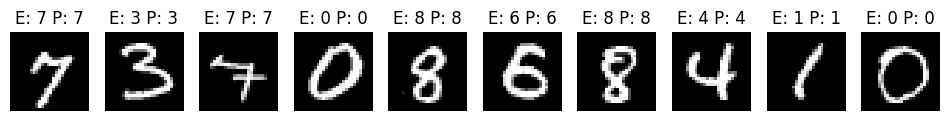

In [5]:
expected = y_test
predicted = classifier.predict(X_test)

# plot n-first expected and predicted values
n = 10
plt.figure(figsize=(12, 6))
for i in range(n):
    plt.subplot(2, n, i + 1)
    plt.imshow(X_test.iloc[i].to_numpy().reshape(28, 28), cmap=plt.cm.gray, interpolation='nearest')
    plt.title(f"E: {expected.iloc[i]} P: {predicted[i]}")
    plt.axis('off')



In [6]:
print('Accuracy :',accuracy_score(y_test, predicted))
print(classification_report(y_test, predicted))

Accuracy : 0.98
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1430
           1       0.99      0.99      0.99      1663
           2       0.97      0.98      0.97      1339
           3       0.98      0.97      0.98      1401
           4       0.97      0.98      0.98      1326
           5       0.98      0.98      0.98      1253
           6       0.98      0.99      0.99      1328
           7       0.97      0.98      0.98      1470
           8       0.98      0.97      0.98      1418
           9       0.98      0.97      0.97      1372

    accuracy                           0.98     14000
   macro avg       0.98      0.98      0.98     14000
weighted avg       0.98      0.98      0.98     14000



In [7]:
# load an image from a file


file_names = [f'{HOUSING_PATH}\digit{i}.png' for i in range(10)]
img_list = []

for file_name in file_names:
    img = Image.open(file_name).convert('L')
    img_array = 1.0 - (np.array(img) / 255.0)
    img_flat = img_array.flatten()
    img_list.append(img_flat)


In [8]:
# predict the digit
img_df = pd.DataFrame(img_list, columns=X_test.columns)
prediction = classifier.predict(img_df)
print(f"Predicted digits: {prediction}")

Predicted digits: ['0' '1' '2' '3' '5' '5' '6' '2' '8' '3']


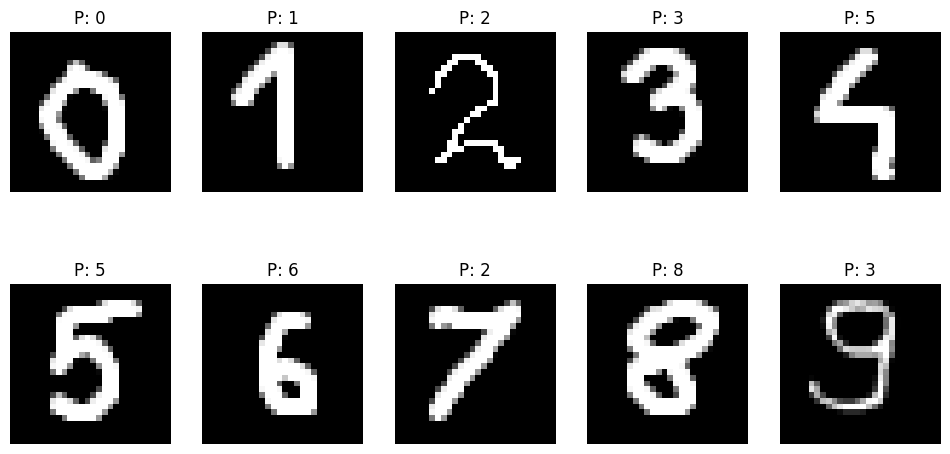

In [9]:
# draw the images from table img_df and predicted values
plt.figure(figsize=(12, 6))
for i in range(len(img_df)):
    plt.subplot(2, 5, i + 1)
    plt.imshow(img_df.iloc[i].to_numpy().reshape(28, 28), cmap='gray', interpolation='nearest')
    plt.title(f"P: {prediction[i]}")
    plt.axis('off')
plt.show()

In [10]:
knn = KNeighborsClassifier(n_neighbors=6, weights='distance')
knn.fit(X_train, y_train)

# Predict on dataset which model has not seen before
result = knn.predict(X_test)
print('Accuracy :', accuracy_score(y_test, result))
print(classification_report(y_test, result))

Accuracy : 0.973
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1430
           1       0.97      0.99      0.98      1663
           2       0.99      0.96      0.97      1339
           3       0.97      0.97      0.97      1401
           4       0.98      0.97      0.98      1326
           5       0.97      0.97      0.97      1253
           6       0.97      0.99      0.98      1328
           7       0.96      0.98      0.97      1470
           8       0.99      0.94      0.96      1418
           9       0.96      0.96      0.96      1372

    accuracy                           0.97     14000
   macro avg       0.97      0.97      0.97     14000
weighted avg       0.97      0.97      0.97     14000



In [11]:
result = knn.predict(img_df)
print(f"Predicted digits: {result}")


Predicted digits: ['0' '1' '2' '3' '9' '5' '6' '1' '8' '3']
